#Comparing HSV and RGB in their capacity to produce consistant image masks

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Load in image for comparison
image = cv2.imread('ballpit.jpg')


##Isolate yellow balls using RGB Mask


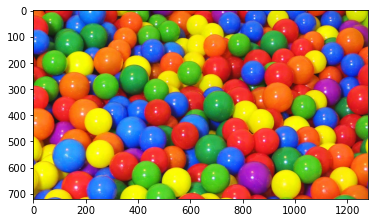

In [41]:
# Make an RGB and HSV copy
img_original = np.copy(image)
imgRGB = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)


plt.imshow(imgRGB)

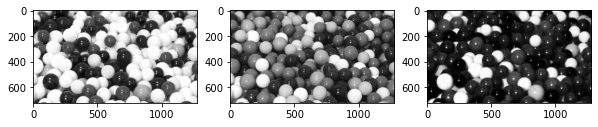

In [42]:
# Display each channel of RGB image

redChannel = imgRGB[:, :, 0]
greenChannel = imgRGB[:, :, 1]
blueChannel = imgRGB[:, :, 2]

f, (axes1, axes2, axes3) = plt.subplots(1, 3, figsize=(10, 25))

axes1.imshow(redChannel, cmap='gray')
axes2.imshow(greenChannel, cmap='gray')
axes3.imshow(blueChannel, cmap='gray')



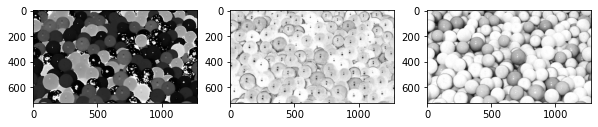

In [44]:
# Display each channel of HSV image
imgHSV = cv2.cvtColor(img_original, cv2.COLOR_BGR2HSV)

hueChannel = imgHSV[:, :, 0]
satChannel = imgHSV[:, :, 1]
valChannel = imgHSV[:, :, 2]

f, (axes1, axes2, axes3) = plt.subplots(1, 3, figsize=(10, 25))


axes1.imshow(hueChannel, cmap='gray')
axes2.imshow(satChannel, cmap='gray')
axes3.imshow(valChannel, cmap='gray')

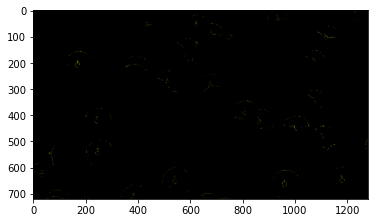

In [ ]:
# Create mask using RGB

# Set threshold to select the yellow in image
lowerRGB = np.array([90,100,30])
higherRGB = np.array([255,255,40])


maskRGB = cv2.inRange(imgRGB, lowerRGB, higherRGB)

masked_image = np.copy(imgRGB)
masked_image[maskRGB == 0] = [0,0,0]

plt.imshow(masked_image)

##Isolate yellow balls using HSV Mask

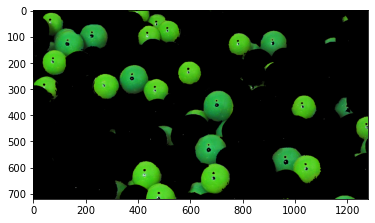

In [51]:
imgHSV = np.copy(imgRGB)

imgHSV = cv2.cvtColor(img_original, cv2.COLOR_BGR2HSV)

lowerHSV = np.array([45, 0, 0])
higherHSV = np.array([75,255,255])

maskHSV = cv2.inRange(imgHSV, lowerHSV, higherHSV)

masked_image = np.copy(imgRGB)
masked_image[maskHSV == 0] = [0,0,0]

plt.imshow(masked_image)
